In [1]:
import initialize

In [2]:
from mistify.process import Piecewise
import torch
import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [17]:
piecwise = Piecewise.linspace(10, 1, lower_x=0, upper_x=1, tunable_y=True, tunable_x=True)

x = torch.rand(300, 1) * 4 - 2
t = (x ** 4).detach()

n = 5000
optim = torch.optim.Adam(piecwise.parameters(), lr=1e-1)
losses = []
with tqdm.tqdm(total=n) as pbar:

    for i in range(n):
        optim.zero_grad()
        y = piecwise(x)
        loss = (y - t).pow(2).mean()
        losses.append(loss.item())
        loss.backward()
        optim.step()
        pbar.set_postfix({'Loss': np.mean(losses[-30:])})
        pbar.update(1)


100%|██████████| 5000/5000 [00:06<00:00, 788.10it/s, Loss=32.1]


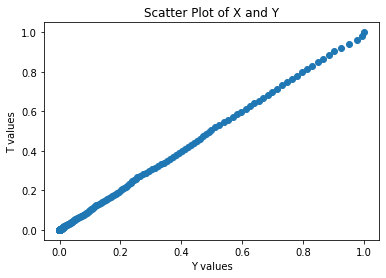

In [20]:

x = torch.linspace(0, 1, steps=200)[:,None]
t = x ** 4
# piecwise = Piecewise.linspace(10, 1, tunable_y=True)

y = piecwise(x)

plt.scatter(y.detach().numpy(), t.detach().numpy())

# Add title and labels
plt.title('Scatter Plot of X and Y')
plt.xlabel('Y values')
plt.ylabel('T values')

# Show the plot
plt.show()